Determining optimal number of clusters...


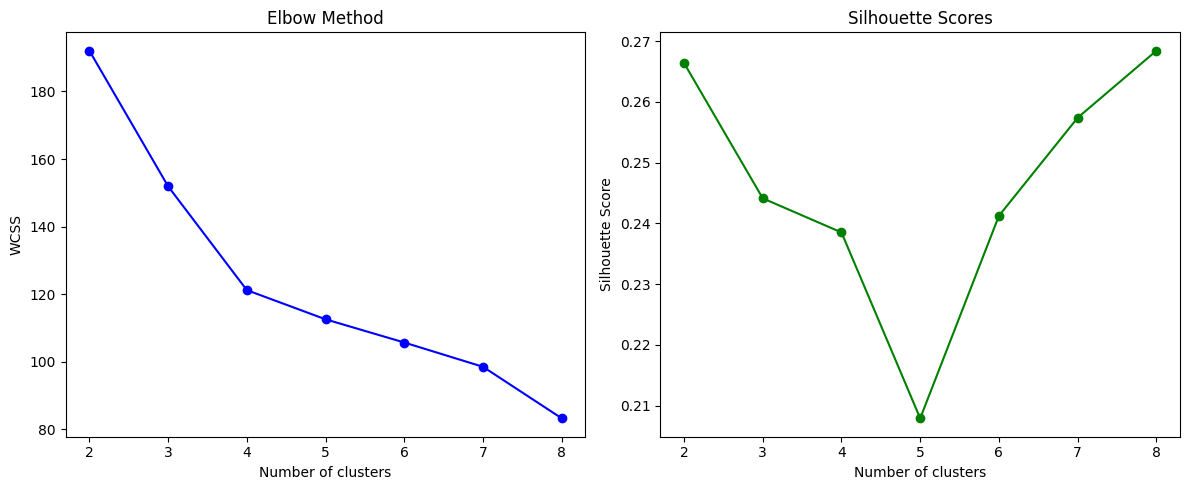


Performing clustering with k=4...


<ipython-input-4-9439cbd1e62f>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='viridis')


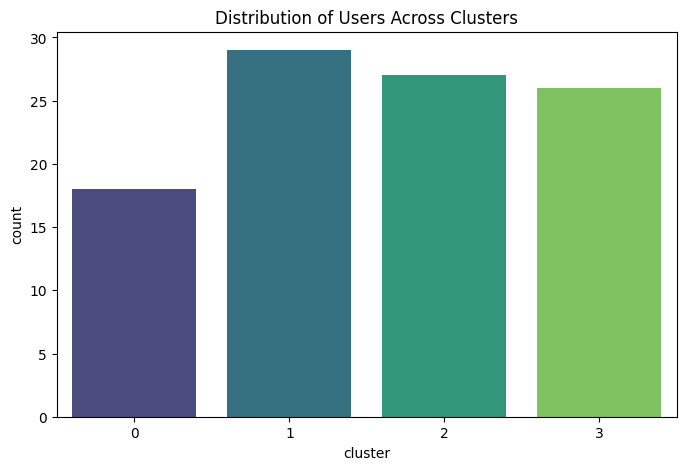

Cluster Profiles:
        watch_time_hour           genre_preference avg_rating_given          
                   mean       std         <lambda>             mean       std
cluster                                                                      
0             18.833333  3.617767         thriller         3.520052  0.638766
1              5.551724  2.860897           comedy         2.142235  0.661919
2             16.370370  3.670550           action         1.655614  0.426098
3              6.653846  3.815152           comedy         4.074365  0.524831


<ipython-input-4-9439cbd1e62f>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='watch_time_hour', data=df, palette='viridis')


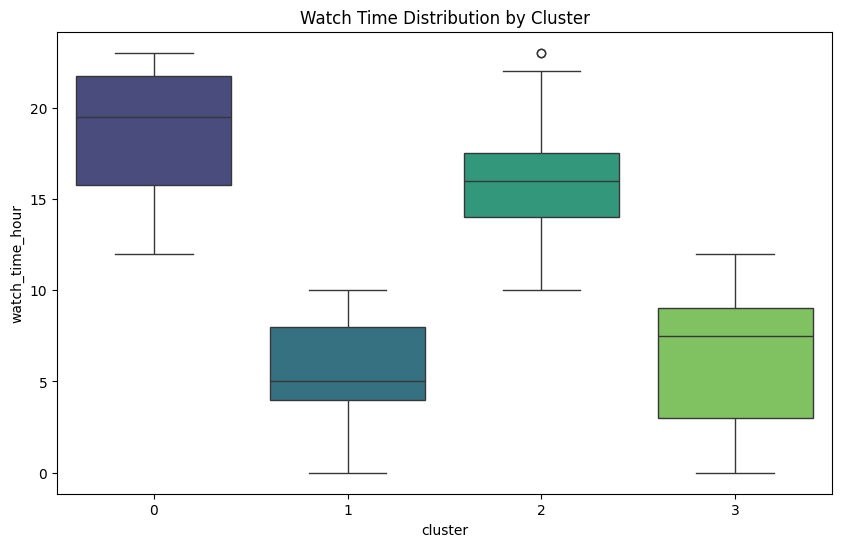

<ipython-input-4-9439cbd1e62f>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='avg_rating_given', data=df, palette='viridis')


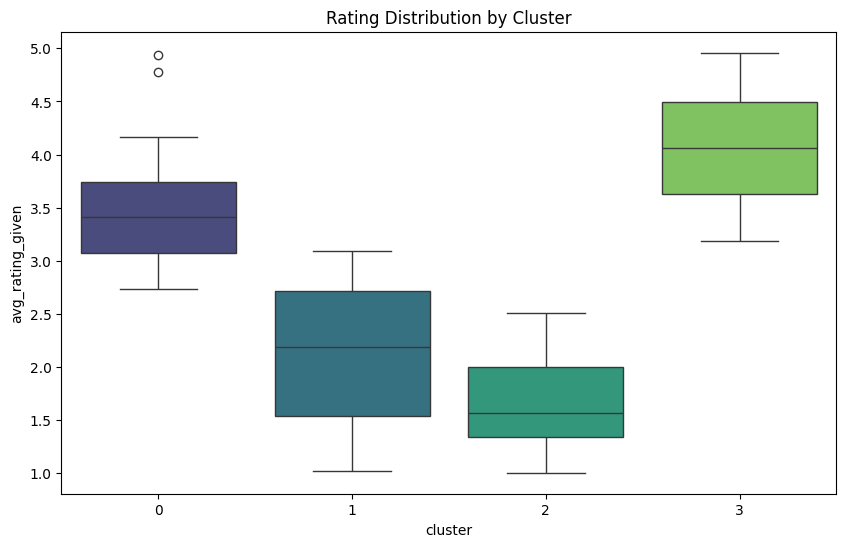

<Figure size 1200x600 with 0 Axes>

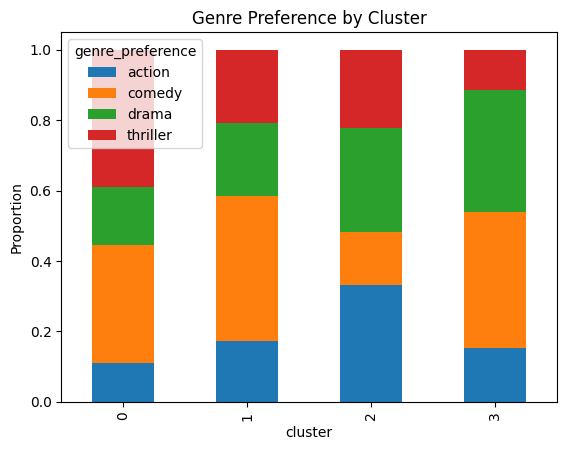


Analysis complete. Results saved to 'clustered_movie_watch.csv'


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer

# 1. Load and prepare the data
def load_and_preprocess_data():
    # Load the data
    df = pd.read_csv('/content/movie_watch.csv')

    # Data preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['watch_time_hour', 'avg_rating_given']),
            ('cat', OneHotEncoder(), ['genre_preference'])
        ])

    processed_data = preprocessor.fit_transform(df)
    return df, processed_data, preprocessor

# 2. Determine optimal number of clusters
def find_optimal_clusters(data):
    wcss = []
    silhouettes = []
    max_clusters = 8

    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(data, kmeans.labels_))

    # Plot the results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters+1), wcss, 'bo-')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters+1), silhouettes, 'go-')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.show()

    return wcss, silhouettes

# 3. Perform clustering and analyze results
def perform_clustering(df, data, n_clusters=4):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    df['cluster'] = clusters

    # Cluster distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x='cluster', data=df, palette='viridis')
    plt.title('Distribution of Users Across Clusters')
    plt.show()

    # Analyze cluster characteristics
    cluster_profile = df.groupby('cluster').agg({
        'watch_time_hour': ['mean', 'std'],
        'genre_preference': lambda x: x.mode()[0],
        'avg_rating_given': ['mean', 'std']
    })

    print("Cluster Profiles:")
    print(cluster_profile)

    # Visualize watch times by cluster
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y='watch_time_hour', data=df, palette='viridis')
    plt.title('Watch Time Distribution by Cluster')
    plt.show()

    # Visualize ratings by cluster
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y='avg_rating_given', data=df, palette='viridis')
    plt.title('Rating Distribution by Cluster')
    plt.show()

    # Genre distribution by cluster
    plt.figure(figsize=(12, 6))
    pd.crosstab(df['cluster'], df['genre_preference'], normalize='index').plot.bar(stacked=True)
    plt.title('Genre Preference by Cluster')
    plt.ylabel('Proportion')
    plt.show()

    return df

# Main execution
if __name__ == "__main__":
    # Step 1: Load and preprocess data
    df, processed_data, preprocessor = load_and_preprocess_data()

    # Step 2: Determine optimal number of clusters
    print("Determining optimal number of clusters...")
    wcss, silhouettes = find_optimal_clusters(processed_data)

    # Step 3: Perform clustering with optimal k (4 in this case)
    print("\nPerforming clustering with k=4...")
    clustered_df = perform_clustering(df, processed_data, n_clusters=4)

    # Save results if needed
    clustered_df.to_csv('clustered_movie_watch.csv', index=False)
    print("\nAnalysis complete. Results saved to 'clustered_movie_watch.csv'")